# MACHINE LEARNING

## FAKE NEWS DETECTION

IMPORTING NECESSARY LIBRARIES

In [ ]:
#import pandas to read the csv file
import pandas as pd
#import numpy to run some statistical routines and operations
import numpy as np
#import statistics to perform some mathematical calculations
import statistics
from statistics import *
#import seaborn for some statistical data visualization
import seaborn as sns
#import matplotlib for plotting
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
#import classification_report to measure the quality of predictions
from sklearn.metrics import classification_report
#impot statsmodels to to explore data
import statsmodels.api as sm
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
#import LogisticRegression
from sklearn.linear_model import LogisticRegression
#import  GaussianNB
from sklearn.naive_bayes import GaussianNB
#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
#import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
#import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
#import BaggingClassifier
from sklearn.ensemble import BaggingClassifier
#import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
#import SVC
from sklearn.svm import SVC


IMPORTING THE DATASET

In [ ]:
df=pd.read_csv('fakenews.csv', error_bad_lines=False)

# New Section

NUMBER OF LABELS AND FEATURES IN DATA

In [ ]:
df.shape

(20800, 5)

THERE ARE 20,800 LABELS AND 5 FEATURES IN THE DATASET

In [ ]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
df.tail()

,id,title,author,text,label
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


CHECK IF THERE ARE ANY MISSING VALUES

In [ ]:
# checking for missing values
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

FILLING THE MISSING VALUES

In [ ]:
df = df.fillna(' ')

In [ ]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

EXPLORATORY DATA ANALYSIS

In [ ]:
df['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

THERE ARE 10413 REAL NEWS AND 10387 FAKE NEWS

CHECKING IF THE NUMBER OF WORDS IN THE ARICLE CAN DETERMINE WHETHER ARTICLE IS FAKE OR REAL

In [ ]:
s=df['text']
words_per_article_plot_t = s[df['label']==0].apply(lambda x: len(x.split()))
stdev_t = statistics.stdev(words_per_article_plot_t)
words_per_article_t = words_per_article_plot_t.sum()/len( s[df['label']==0])

words_per_article_plot_f =  s[df['label']==1].apply(lambda x: len(x.split()))
stdev_f = statistics.stdev(words_per_article_plot_f)
words_per_article_f = words_per_article_plot_f.sum()/len( s[df['label']==1])

print ("The average number of words in a real news article is ", words_per_article_t)
print ("The average number of words in a fake news article is ", words_per_article_f)


The average number of words in a real news article is  878.9965341292
The average number of words in a fake news article is  639.06847210218


REAL NEWS CONSISTS OF MORE NUMBER OF WORDS COMPARED TO FAKE NEWS, BUT HONESTLY I CANT COUNT THE WORDS IN A ARTICLE TO MAKE SURE ITS REAL

GRAPH FOR BETTER UNDERSTANDING

Text(0.5, 1.0, 'Number of Words in Fake News Article')

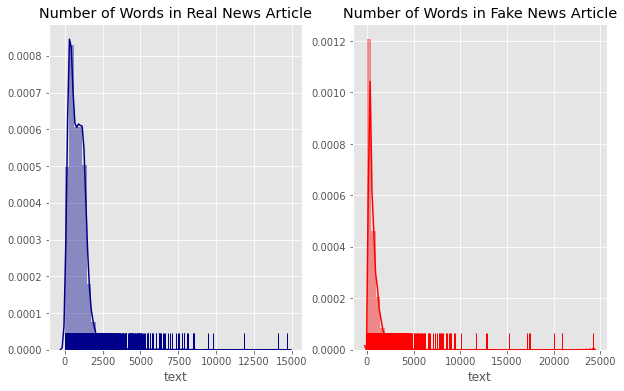

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.distplot(words_per_article_plot_t, ax = ax[0], color = "darkblue", rug = True).set_title("Number of Words in Real News Article")
sns.distplot(words_per_article_plot_f, ax = ax[1], color = "red", rug = True).set_title("Number of Words in Fake News Article")

CHECKING IF THE NUMBER OF WORDS IN THE ARICLE HEADLINE CAN DETERMINE WHETHER ARTICLE IS FAKE OR REAL

In [ ]:
q=df['title']
words_per_headline_plot_t = q[df['label']==0].apply(lambda x: len(x.split()))
stdev_t_head = statistics.stdev(words_per_headline_plot_t)
words_per_headline_t = words_per_headline_plot_t.sum()/len(q[df['label']==0])

words_per_headline_plot_f = q[df['label']==1].apply(lambda x: len(x.split()))
stdev_f_head = statistics.stdev(words_per_headline_plot_f)
words_per_headline_f = words_per_headline_plot_f.sum()/len(q[df['label']==1])

print ("The average number of words in a real news article is ", words_per_headline_t)
print ("The average number of words in a fake news article is ", words_per_headline_f)


The average number of words in a real news article is  13.665928564551844
The average number of words in a fake news article is  10.513012580428311


13 AND 10 ARE PRETTY CLOSE SO HEADLINES ARE NOT OF MUCH USE TO DETERMINE IF ITS REAL

Text(0.5, 1.0, 'Number of Words in Fake News Headline')

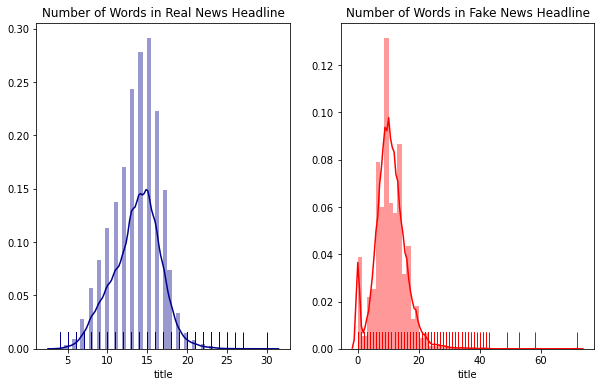

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.distplot(words_per_headline_plot_t, ax = ax[0], color = "darkblue", rug = True).set_title("Number of Words in Real News Headline")
sns.distplot(words_per_headline_plot_f, ax = ax[1], color = "red", rug = True).set_title("Number of Words in Fake News Headline")

COMBINING TITLE AUTHOR AND TEXT COLUMNS TO CREATE A NEW COLUMN 'ARTICLE'

In [ ]:
df['article'] = df['title'] + ' ' + df['author'] + ' ' + df['text']


In [ ]:
df.head()

,id,title,author,text,label,article
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [ ]:
df.tail()

,id,title,author,text,label,article
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,Rapper T.I.: Trump a ’Poster Child For White S...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,"N.F.L. Playoffs: Schedule, Matchups and Odds -..."
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,Macy’s Is Said to Receive Takeover Approach by...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,"NATO, Russia To Hold Parallel Exercises In Bal..."
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1,What Keeps the F-35 Alive David Swanson Davi...


In [ ]:
# Change the labels
#df.loc[(df['label'] == 1) , ['label']] = 'FAKE'
#df.loc[(df['label'] == 0) , ['label']] = 'REAL'

SENTIMENT ANALYSIS ON WORDS IN THE ARTICLE

In [ ]:
import textblob
from textblob import TextBlob
article_polarity_true = pd.DataFrame(columns=["article", "sentiment"])
for article in s[df['label']==1]:
    article = TextBlob(article)
    article_polarity_true = article_polarity_true.append(pd.Series([article,article.sentiment.polarity], index=article_polarity_true.columns), ignore_index=True)

In [ ]:
import textblob
from textblob import TextBlob
article_polarity_fake = pd.DataFrame(columns=["article", "sentiment"])
for article in s[df['label']==0]:
    article = TextBlob(article)
    article_polarity_fake = article_polarity_fake.append(pd.Series([article,article.sentiment.polarity], index=article_polarity_fake.columns), ignore_index=True)

In [ ]:
print(statistics.mean(article_polarity_true["sentiment"]))
print(statistics.mean(article_polarity_fake["sentiment"]))

0.07355788748070559
0.06901559234568146


SINCE THEY TRY TO MAKE FAKE NEWS SEEM REAL THEY HAVE ALMOST SIMILAR SENTIMENT POLARITY

SENTIMENT ANALYSIS ON TITLE OF ARTICLE

In [ ]:

headline_polarity_true = pd.DataFrame(columns=["headline", "sentiment"])
for headline in s[df['label']==1]:
    headline = TextBlob(headline)
    headline_polarity_true = headline_polarity_true.append(pd.Series([headline,headline.sentiment.polarity], index=headline_polarity_true.columns), ignore_index=True)

In [ ]:
headline_polarity_fake = pd.DataFrame(columns=["headline", "sentiment"])
for headline in s[df['label']==0]:
    headline = TextBlob(headline)
    headline_polarity_fake = headline_polarity_fake.append(pd.Series([headline,headline.sentiment.polarity], index=headline_polarity_fake.columns), ignore_index=True)

In [ ]:
#SOME MOST NEGATIVE TITLES OF ARTICLE
from plotly.graph_objs import *
import plotly.graph_objects as go
a = str(headline_polarity_true.sort_values(by = ["sentiment"], ascending = True, ignore_index=True)["headline"][0])
b = str(headline_polarity_true.sort_values(by = ["sentiment"], ascending = True, ignore_index=True)["headline"][1])
c = str(headline_polarity_true.sort_values(by = ["sentiment"], ascending = True, ignore_index=True)["headline"][3])
fig = go.Figure(data=[go.Table(header=dict(values=['Headline']),
                 cells=dict(values=[[a, b,c]]))])
fig.show()

In [ ]:
#SOME POSITIVE TITLES OF ARTICLES
a = str(headline_polarity_true.sort_values(by = ["sentiment"], ascending = False, ignore_index=True)["headline"][0])
b = str(headline_polarity_true.sort_values(by = ["sentiment"], ascending = False, ignore_index=True)["headline"][2])
c = str(headline_polarity_true.sort_values(by = ["sentiment"], ascending = False, ignore_index=True)["headline"][4])
fig = go.Figure(data=[go.Table(header=dict(values=['Headline']),
                 cells=dict(values=[[a, b,c]]))])
fig.show()

In [ ]:

print(statistics.mean(headline_polarity_true["sentiment"]))
print(statistics.mean(headline_polarity_fake["sentiment"]))

0.06901559234568146
0.07355788748070559


Text(0.5, 1.0, 'Fake News Headline Sentiments')

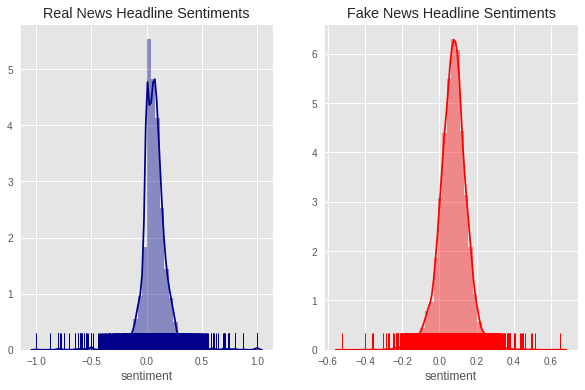

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.distplot(headline_polarity_true["sentiment"], ax = ax[0], color = "darkblue", rug = True).set_title("Real News Headline Sentiments")
sns.distplot(headline_polarity_fake["sentiment"], ax = ax[1], color = "red", rug = True).set_title("Fake News Headline Sentiments")

Import TfidfTransformer AND CountVectorizer.Tfidftransformer will systematically compute word counts using CountVectorizer and then compute the Inverse Document Frequency (IDF) values and only then compute the Tf-idf scores.

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
transformer = TfidfTransformer(smooth_idf=False)
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2))

In [ ]:
counts = ngram_vectorizer.fit_transform(df['article'].values)

In [ ]:
tfidf = transformer.fit_transform(counts)

In [ ]:
tfidf.data

array([0.01497752, 0.00529897, 0.02751587, ..., 0.02152492, 0.03273783,
       0.01937926])

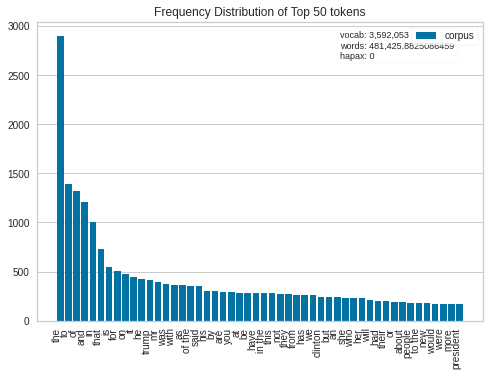

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.datasets import load_hobbies
features   = ngram_vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(tfidf)
visualizer.poof()

In [ ]:
targets = df['label'].values

IMPORT train_test_split TO SPLIT THE DATASET INTO TEST AND TRAIN

In [ ]:
from sklearn.model_selection import train_test_split

SPLITTING THE DATASET AFTER SOME PRE PROCESSING USING STANDARD SCALER



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tfidf,targets, random_state=0,test_size=0.3)

BUILDING THE MODELS

1.Lets start with basic logistic regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, np.ravel(y_train))
y_pred_lr = lr.predict(X_test)
print ("Accuracy is: ", metrics.accuracy_score(y_test, y_pred_lr))

Accuracy is:  0.9456730769230769


LOGISITC REGRESSION GAVE AN ACCURACY OF 94.56 WHICH IS NOT BAD

In [ ]:
lr_cm = metrics.confusion_matrix(y_test, y_pred_lr)
print (lr_cm)

[[2876  208]
 [ 131 3025]]


VISUALIZING USING CONFUSION MATRIX FOR LOGISTIC REGRESSION

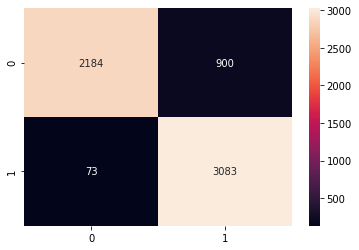

In [ ]:
labels =  np.array([['2184','900'],['73','3083']])
sns.heatmap(lr_cm, annot=labels, fmt = '')
plt.show()

CLASSIFICATION REPORT LOGISTIC REGRESSION

In [ ]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      3084
           1       0.94      0.96      0.95      3156

    accuracy                           0.95      6240
   macro avg       0.95      0.95      0.95      6240
weighted avg       0.95      0.95      0.95      6240



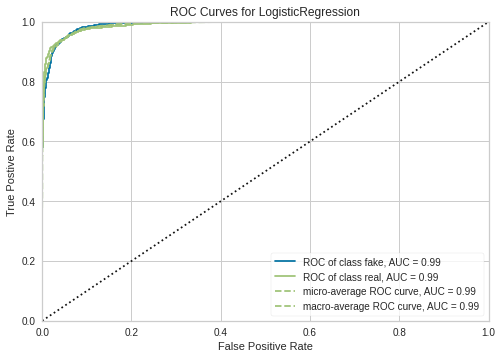

In [ ]:
from yellowbrick.classifier import ROCAUC
#roc_auc(lr, X_train, y_train, X_test=X_test, y_test=y_test, classes=['not_defaulted', 'defaulted'])

visualizer = ROCAUC(lr, classes=["fake", "real"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.poof()                       # Finalize and render the figure

2. KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 100)
# Fit the classifier to the data
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
knn.score(X_test, y_test)

0.6701923076923076

In [ ]:
knn_cm = metrics.confusion_matrix(y_test,knn_pred)
print (knn_cm)

[[1143 1941]
 [ 117 3039]]


VISUALIZING CONFUSION MATRIX FOR KNeighborsClassifier

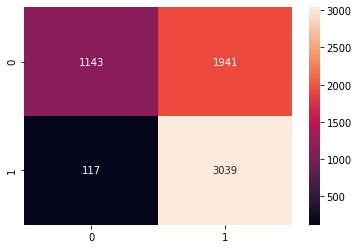

In [ ]:
labels =  np.array([['1143','1941'],['117','3039']])
sns.heatmap(knn_cm, annot=labels, fmt = '')
plt.show()

CLASSIFICATION REPORT OF KNeighborsClassifier

In [ ]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.91      0.37      0.53      3084
           1       0.61      0.96      0.75      3156

    accuracy                           0.67      6240
   macro avg       0.76      0.67      0.64      6240
weighted avg       0.76      0.67      0.64      6240



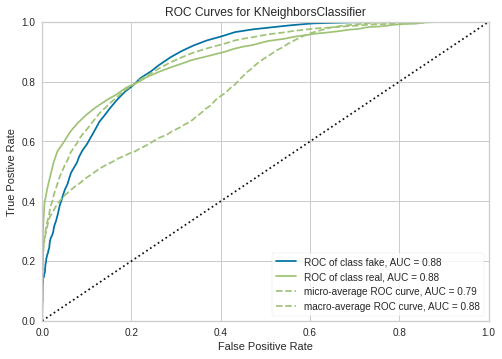

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 100)
visualizer = ROCAUC(knn, classes=["fake", "real"])
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.poof()                       # Finalize and render the figure

3 .DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier(max_depth=100,random_state=0)
dtree.fit(X_train,y_train)
y_pred_dtree = dtree.predict(X_test)
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred_dtree))

Accuracy Score: 0.9733974358974359


In [ ]:
pd.crosstab(y_test, y_pred_dtree, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,0,1
Actual Result,,
0,2997,87
1,79,3077


CLASSIFICATION REPORT OF DecisionTreeClassifier

In [ ]:
print(classification_report(y_test, y_pred_dtree))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3084
           1       0.97      0.97      0.97      3156

    accuracy                           0.97      6240
   macro avg       0.97      0.97      0.97      6240
weighted avg       0.97      0.97      0.97      6240



4.RANDOM FOREST CLASSIFIER

In [ ]:
RF=RandomForestClassifier(n_jobs=2, random_state=0)
RF.fit(X_train, y_train)
preds = RF.predict(X_test)
print("Accuracy is:", metrics.accuracy_score(y_test, preds))

Accuracy is: 0.9206730769230769


In [ ]:
rnf_cm = metrics.confusion_matrix(y_test,preds)
print (rnf_cm)

[[2891  193]
 [ 302 2854]]


VISUALIZING CONFUSION MATRIX RANDOM FOREST

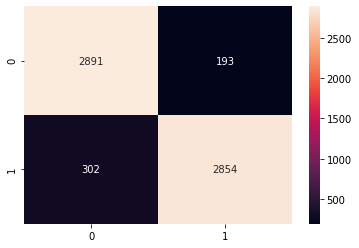

In [ ]:
labels =  np.array([['2891','193'],['302','2854']])
sns.heatmap(rnf_cm, annot=labels, fmt = '')
plt.show()

CLASSIFICATION REPORT OF RANDOM FOREST CLASSIFIER

In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      3084
           1       0.94      0.90      0.92      3156

    accuracy                           0.92      6240
   macro avg       0.92      0.92      0.92      6240
weighted avg       0.92      0.92      0.92      6240



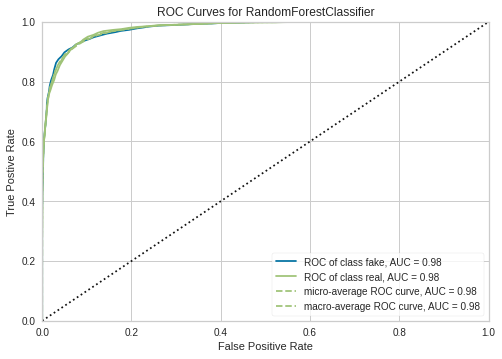

In [ ]:
RF=RandomForestClassifier(n_jobs=2, random_state=0)
visualizer = ROCAUC(RF, classes=["fake", "real"])
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.poof()                       # Finalize and render the figure

5.MULTINOMIAL NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_mnb = nb.predict(X_test)
print("Accuracy is:", metrics.accuracy_score(y_test, y_pred_mnb))


Accuracy is: 0.7858974358974359


In [ ]:
mnb_cm = metrics.confusion_matrix(y_test,y_pred_mnb)
print (mnb_cm)

[[3082    2]
 [1334 1822]]


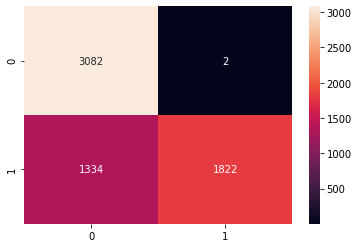

In [ ]:
labels =  np.array([['3082','2'],['1334','1822']])
sns.heatmap(mnb_cm, annot=labels, fmt = '')
plt.show()

CLASSIFICATION REPORT OF MULTINOMIAL NAIVE BAYES

In [ ]:
print(classification_report(y_test, y_pred_mnb))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82      3084
           1       1.00      0.58      0.73      3156

    accuracy                           0.79      6240
   macro avg       0.85      0.79      0.78      6240
weighted avg       0.85      0.79      0.78      6240



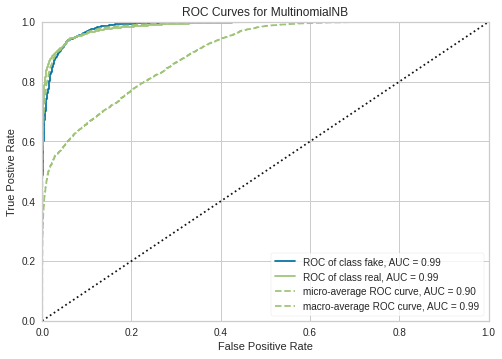

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
visualizer = ROCAUC(nb, classes=["fake", "real"])
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.poof()                       # Finalize and render the figure

6.AdaBoostClassifier

In [ ]:
Adab= AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=5)
Adab.fit(X_train, y_train)
y_pred_adab = Adab.predict(X_test)
print("Accuracy is:", metrics.accuracy_score(y_test, y_pred_adab))

Accuracy is: 0.9533653846153847


In [ ]:
adab_cm = metrics.confusion_matrix(y_test,y_pred_adab)
print (adab_cm)

[[2938  146]
 [ 145 3011]]


VISUALIZING CONFUSION MATRIX OF ADABOOSTCLASSIFIER

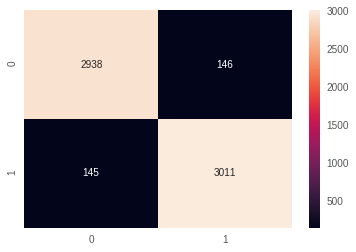

In [ ]:
labels =  np.array([['2938','146'],['145','3011']])
sns.heatmap(adab_cm, annot=labels, fmt = '')
plt.show()

CLASSIFICATION REPORT OF ADABOOST CLASSIFIER

In [ ]:
print(classification_report(y_test, y_pred_adab))

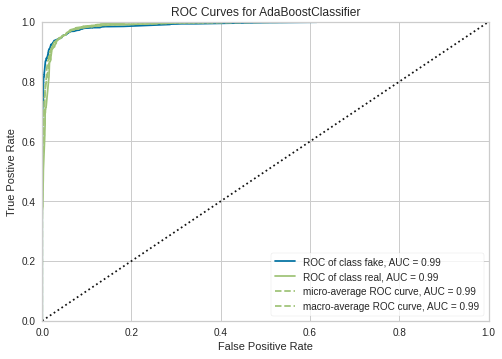

In [ ]:
Adab= AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=5)
visualizer = ROCAUC(Adab, classes=["fake", "real"])
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.poof()                       # Finalize and render the figure

7.BAGGING CLASSIFIER

In [ ]:
bag_model = BaggingClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=5)
bag_model.fit(X_train, y_train)
y_pred_bag = bag_model.predict(X_test)
print("Accuracy is:", metrics.accuracy_score(y_test, y_pred_bag))

Accuracy is: 0.9479166666666666


In [ ]:
bagc_cm = metrics.confusion_matrix(y_test,y_pred_bag)
print (bagc_cm)

[[2883  201]
 [ 124 3032]]


VISUALIZING CONFUSION MATRIX OF BAGGING CLASSIFIER

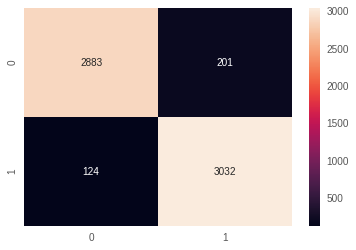

In [ ]:
labels =  np.array([['2883','201'],['124','3032']])
sns.heatmap(bagc_cm, annot=labels, fmt = '')
plt.show()

CLASSIFICATION REPORT FOR BAGGING CLASSIFIER

In [ ]:
print(classification_report(y_test, y_pred_bag))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3084
           1       0.94      0.96      0.95      3156

    accuracy                           0.94      6240
   macro avg       0.94      0.94      0.94      6240
weighted avg       0.94      0.94      0.94      6240



In [ ]:
bag_model = BaggingClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=5)
visualizer = ROCAUC(bag_model, classes=["fake", "real"])
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.poof()                       # Finalize and render the figure

8. SVC

In [ ]:
#Linear kernel fits decently well, decided not to use another kernel because of parsimony
#and because linear has the lowest risk of overfitting
svc = SVC(kernel='linear', random_state=1)
svc.fit(X_train, np.ravel(y_train))
y_pred_svm = svc.predict(X_test)

In [ ]:
print("Accuracy is:", metrics.accuracy_score(y_test, y_pred_svm))

Accuracy is: 0.9798076923076923


In [ ]:
svm_cm = metrics.confusion_matrix(y_test, y_pred_svm)
print(svm_cm)

[[3005   79]
 [  47 3109]]


VISUALIZING CONFUSION MATRIX OF SVM

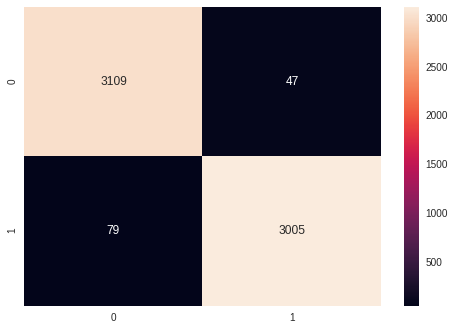

In [ ]:
labels =  np.array([['3109','47'],['79','3005']])
sns.heatmap(svm_cm, annot=labels, fmt = '')
plt.show()

CLASSIFICATION REPORT OF SVM

In [ ]:
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3084
           1       0.98      0.99      0.98      3156

    accuracy                           0.98      6240
   macro avg       0.98      0.98      0.98      6240
weighted avg       0.98      0.98      0.98      6240



In [ ]:
print (metrics.roc_auc_score(y_test, y_pred_svm))

0.9797458241481855


XGBOOST CLASSIFIER

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred_XGB = XGB.predict(X_test)
print("Accuracy is:", metrics.accuracy_score(y_test, y_pred_XGB))

Accuracy is: 0.9727564102564102


In [ ]:
xgb_cm = metrics.confusion_matrix(y_test,y_pred_XGB)
print (xgb_cm)

[[2970  114]
 [  56 3100]]


VISUALIZING CONFUSION MATRIX OF XGBOOST CLASSIFIER

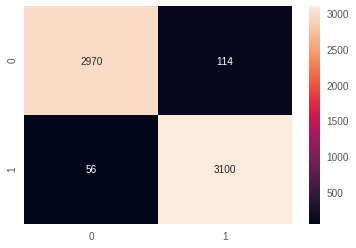

In [ ]:
labels =  np.array([['2970','114'],['56','3100']])
sns.heatmap(xgb_cm, annot=labels, fmt = '')
plt.show()

XGBOOST CLASSIFIER CLASSIFICATION REPORT

In [ ]:
print(classification_report(y_test, y_pred_XGB))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3084
           1       0.96      0.98      0.97      3156

    accuracy                           0.97      6240
   macro avg       0.97      0.97      0.97      6240
weighted avg       0.97      0.97      0.97      6240



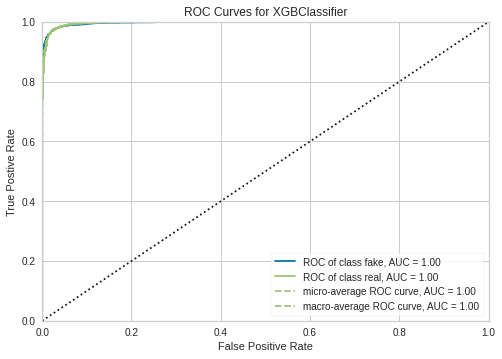

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
XGB = XGBClassifier()
visualizer = ROCAUC(XGB, classes=["fake", "real"])
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.poof()                       # Finalize and render the figure

KERAS MODEL

In [ ]:
# Build the architecture of the model
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]  # Number of features
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                35920540  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 35,920,551
Trainable params: 35,920,551
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test))

Train on 14560 samples, validate on 6240 samples
Epoch 1/10
14560/14560 [==============================] - 887s 61ms/step - loss: 0.2606 - accuracy: 0.9489 - val_loss: 0.0953 - val_accuracy: 0.9777
Epoch 2/10
14560/14560 [==============================] - 857s 59ms/step - loss: 0.0099 - accuracy: 0.9992 - val_loss: 0.0760 - val_accuracy: 0.9790
Epoch 3/10
14560/14560 [==============================] - 838s 58ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0682 - val_accuracy: 0.9792
Epoch 4/10
14560/14560 [==============================] - 807s 55ms/step - loss: 7.7128e-04 - accuracy: 1.0000 - val_loss: 0.0635 - val_accuracy: 0.9796
Epoch 5/10
14560/14560 [==============================] - 789s 54ms/step - loss: 3.2457e-04 - accuracy: 1.0000 - val_loss: 0.0602 - val_accuracy: 0.9804
Epoch 6/10
14560/14560 [==============================] - 783s 54ms/step - loss: 1.4087e-04 - accuracy: 1.0000 - val_loss: 0.0579 - val_accuracy: 0.9808
Epoch 7/10
14560/14560 [=====================

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.9808


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


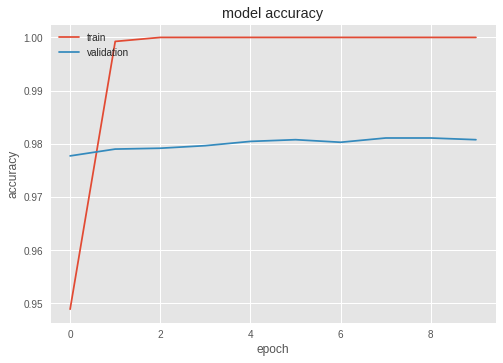

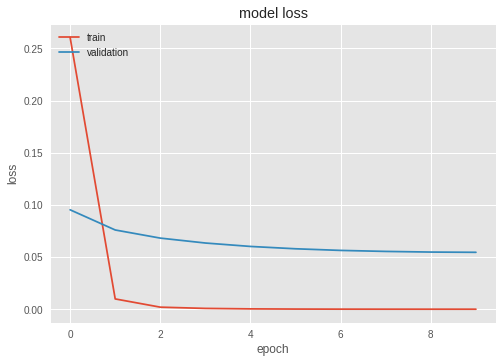

In [ ]:
#visualizing
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

MODEL ACCURACIES

MODEL---------------------------------------------ACCURACY

---




KNEIGHBORS CLASSIFIER--------------------67.81

---




MULTINOMIAL NAIVE BAYES---------------78.58



---

RANDOM FOREST CLASSIFIER-------------92.06               

---

BAGGING CLASSIFIER---------------------------94.79

---
LOGISTIC REGRESSION-------------------------94.56



---


ADABOOST CLASSIFIER-----------------------95.33


---
XGBOOST CLASSIFIER--------------------------97.27

---

SVM-------------------------------------------------------97.98

---

KERAS----------------------------------------------------98.08



OUT OF ALL THE MACHINE LEARNING ALGORITHMS XGBOOST CLASSIFIER AND SVM MODELS PERFORMED VERY WELL AS EXPECTED.KERAS GAVE THE HIGHEST ACCURACY.